# EDA automático

In [1]:
#!pip install sweetviz
#!pip install seaborn

In [2]:
# Importar librerías necesarias
import sweetviz as sv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Auto EDA de tidy_agricultura_ganadería_pesca

In [4]:
# Cargar tus datos
agp_df = pd.read_csv('../data/tidy_agricultura_ganaderia_pesca.csv', parse_dates=['ANO'])
imss_df = pd.read_csv('../data/tidy_imss.csv', parse_dates=['año'])


In [72]:
# Crear el informe Sweetviz
informe_eda_AGP = sv.analyze(agp_df)

# Mostrar el informe en el navegador
informe_eda_AGP.show_html('informe_eda_AGP.html')

Feature: ANO                                 |█         | [ 11%]   00:00 -> (00:00 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: SECTOR                              |██▏       | [ 22%]   00:00 -> (00:00 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: ESPECIE_CULTIVO                     |█████▌    | [ 56%]   00:01 -> (00:01 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/pytho

Report informe_eda_AGP.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 2. Auto EDA de tidy_imss

In [73]:
# Crear el informe Sweetviz
informe_eda_imss = sv.analyze(imss_df)

# Mostrar el informe en el navegador
informe_eda_imss.show_html('informe_eda_IMSS.html')

Feature: rango_salarial                      |▋         | [  7%]   00:02 -> (00:28 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: año                                 |██▋       | [ 27%]   00:03 -> (00:05 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/python3.9/site-packages/sweetviz/from_profiling_pandas.py:65: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(keys):
Feature: fecha                               |████      | [ 40%]   00:03 -> (00:04 left)/Users/estephaniapivacalcaraz/Desktop/trabajos_generados - entrega_2/.venv/lib/pytho

Report informe_eda_IMSS.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 3. Datos faltantes

De los auto EDA podemos notar que: 
- Para el caso de la tabla de agricultura/ganadería/pesca no tenemos niungún dato faltante.
- En la tabla de empleos generados del IMSS tenemos 660 datos faltantes (menos del 1% de los datos) en la columna de rango salarial.

En esta sección exploraremos los datos faltantes de IMSS.

In [83]:
# Explorar el dataframe
imss_df.head()

,rango_salarial,asegurados,no_trabajadores,año,mes,fecha,municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patronal,sexo,rango_edad,rango_salarial_descripcion
0,W2,4,0,2018-01-01,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
1,W2,4,0,2018-01-01,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
2,W7,1,0,2018-01-01,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 60 y menor a 65 años de edad,mayor a 6 y hasta 7 veces el salario mínimo
3,W2,3,0,2018-01-01,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 65 y menor a 70 años de edad,mayor a 1 y hasta 2 veces el salario mínimo
4,W14,1,0,2018-01-01,1,2018-01-01,SAN LUIS RÍO COLORADO,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,Con un puesto de trabajo,Hombre,Mayor o igual a 70 y menor a 75 años de edad,mayor a 13 y hasta 14 veces el salario mínimo


In [89]:
# Conteo de valores de rango salarial
conteo_por_categoria = imss_df['rango_salarial'].value_counts(dropna=False)
conteo_por_categoria

rango_salarial
W2     249761
W3     125460
W4      77981
W5      50095
W6      32323
W7      22077
W8      16027
W9      10937
W10      8047
W11      5795
W12      5102
W14      4759
W13      4144
W16      3977
W18      2609
W15      2285
W21      1665
W17      1359
W23      1259
W1        944
W20       938
W19       752
W22       683
NaN       660
Name: count, dtype: int64

In [90]:
# Contar datos faltantes
imss_df['rango_salarial'].isna().sum()

660

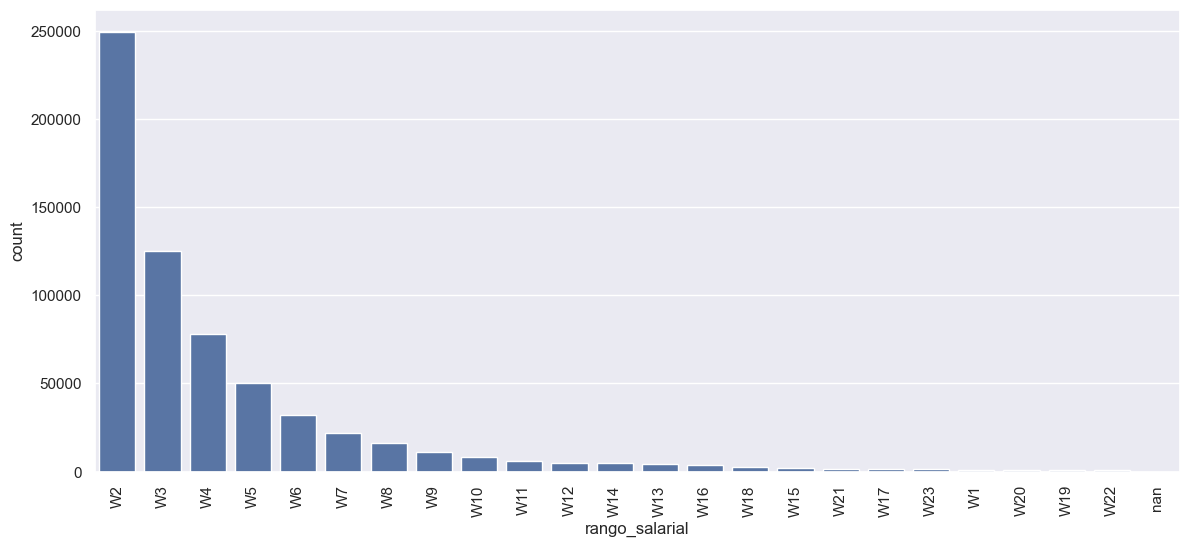

In [91]:
# Visualizar la frecuencia de cada categoría
# Ordenamos las categorías por el conteo de mayor a menor
orden_categorias = conteo_por_categoria.index

# Creamos el gráfico de barras con el orden especificado
sns.set_theme()
plt.figure(figsize=(14, 6))  # Ajustar el tamaño 
ax = sns.countplot(x='rango_salarial', data=imss_df, order=orden_categorias)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x 

plt.show()